In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

import mlflow

dataset : https://www.kaggle.com/tolgahancepel/toyota-corolla/version/1

Price: Offer Price in EUROs
Age: Age in years
KM: Accumulated Kilometers on odometer
FuelType: Fuel Type (Petrol, Diesel, CNG)
HP: Horse Power
MetColor: Metallic Color? (Yes=1, No=0)
Automatic: Automatic ( (Yes=1, No=0)
CC: Cylinder Volume in cubic centimeters
Doors: Number of doors
Weight: Weight in Kilograms

In [ ]:
toyota_df = pd.read_csv('/dbfs/FileStore/datasets/ToyotaCorolla.csv')

toyota_df.sample(5)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
736,9250,68,84482,Petrol,110,1,0,1600,5,1075
17,17950,24,21716,Petrol,110,1,0,1600,3,1105
92,19950,16,34472,Diesel,90,1,0,1995,3,1260
1337,8750,75,63634,Petrol,110,1,0,1600,4,1035
13,21500,31,23000,Petrol,192,1,0,1800,3,1185


In [ ]:
toyota_df.shape

Out[6]: (1436, 10)

In [ ]:
toyota_df.isnull().sum()

Out[7]: Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [ ]:
toyota_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
MetColor,1436.0,0.674791,0.468616,0.0,0.0,1.0,1.00,1.0
Automatic,1436.0,0.055710,0.229441,0.0,0.0,0.0,0.00,1.0
CC,1436.0,1566.827994,187.182436,1300.0,1400.0,1600.0,1600.00,2000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


Out[9]: <AxesSubplot:ylabel='Price'>

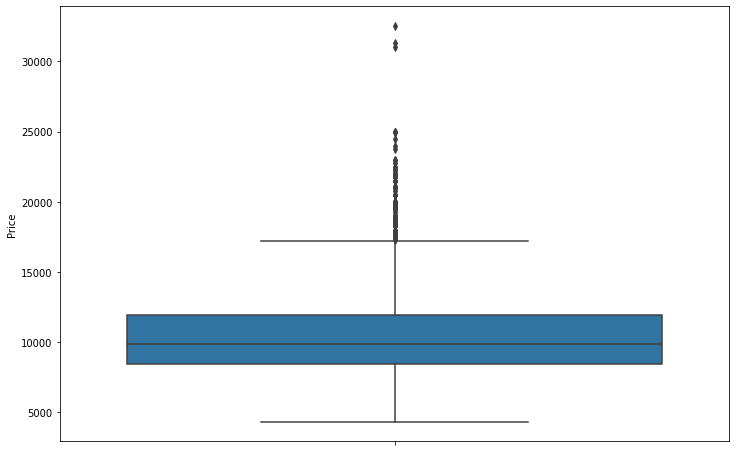

In [ ]:
plt.figure(figsize = (12, 8))

sns.boxplot(data = toyota_df, y = 'Price')

Out[10]: <AxesSubplot:xlabel='Price', ylabel='KM'>

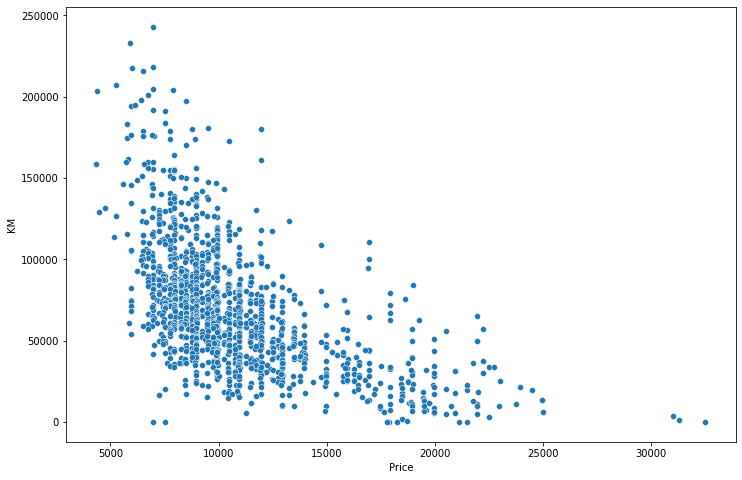

In [ ]:
plt.figure(figsize = (12, 8))

sns.scatterplot(data = toyota_df, x = 'Price', y = 'KM')

Out[11]: <AxesSubplot:xlabel='Price', ylabel='FuelType'>

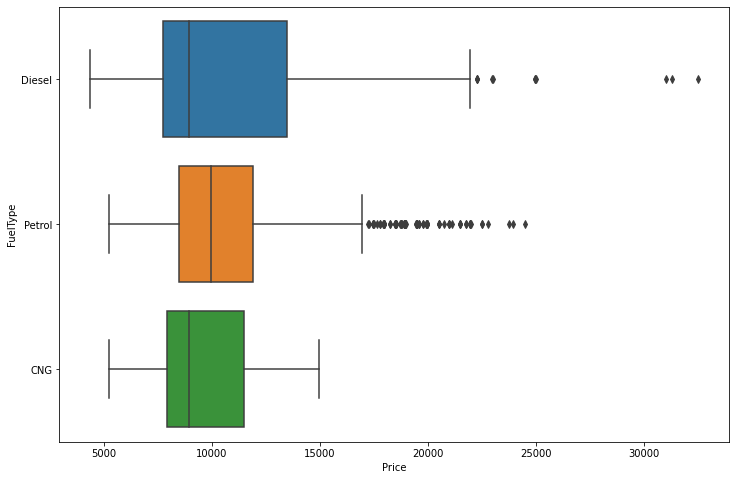

In [ ]:
plt.figure(figsize = (12, 8))

sns.boxplot(data = toyota_df, x = 'Price', y = 'FuelType')

Out[12]: <AxesSubplot:>

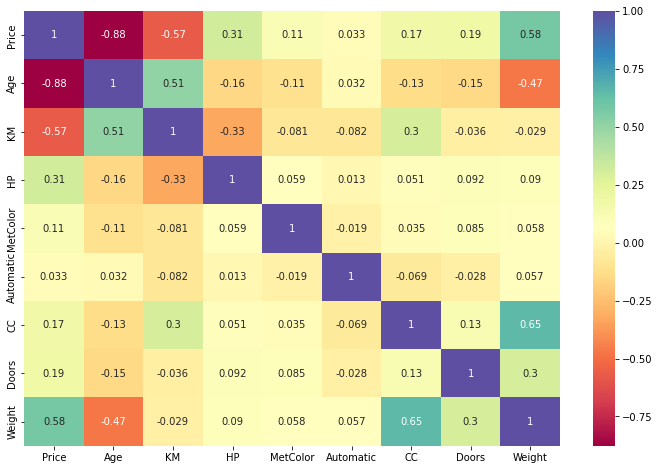

In [ ]:
plt.figure(figsize = (12, 8))

sns.heatmap(toyota_df.corr(), annot = True, cmap = 'Spectral')

Feature engineering

In [ ]:
toyota_df = pd.get_dummies(toyota_df, columns = ['FuelType'])

toyota_df.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,0,1,0
1,13750,23,72937,90,1,0,2000,3,1165,0,1,0
2,13950,24,41711,90,1,0,2000,3,1165,0,1,0
3,14950,26,48000,90,0,0,2000,3,1165,0,1,0
4,13750,30,38500,90,0,0,2000,3,1170,0,1,0


In [ ]:
X = toyota_df[['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
               'Weight', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol']]

y = toyota_df['Price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

Out[29]: ((1148, 11), (288, 11), (1148,), (288,))

In [ ]:
numerical_data = ['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight']
categorical_data = ['FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol']

X_train_numerical = X_train[numerical_data]
X_test_numerical = X_test[numerical_data]

X_train_categorical = X_train[categorical_data]
X_test_categorical = X_test[categorical_data]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_numerical = pd.DataFrame(scaler.fit_transform(X_train_numerical),
                                 columns = X_train_numerical.columns)

X_test_numerical = pd.DataFrame(scaler.transform(X_test_numerical),
                                columns = X_test_numerical.columns)

X_test_numerical.head()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,-0.324002,-1.035367,0.569832,0.690997,4.048943,0.156117,-1.087550,0.064963
1,-1.567817,-0.837197,0.569832,-1.447183,-0.246978,0.156117,1.016085,1.204659
2,0.324945,-0.308057,0.569832,0.690997,-0.246978,0.156117,1.016085,0.064963
3,0.595339,1.759564,0.569832,0.690997,-0.246978,0.156117,1.016085,0.997441
4,-1.675975,-1.159332,-0.307882,-1.447183,-0.246978,-0.916077,-1.087550,0.583007


In [ ]:
X_train_categorical.reset_index(drop = True, inplace = True)
X_train_numerical.reset_index(drop = True, inplace = True)

X_train = pd.concat([X_train_numerical, X_train_categorical], axis = 1)

X_train.head()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,1.027970,-0.127612,0.367282,-1.447183,4.048943,0.156117,-1.087550,0.272180,0,0,1
1,-1.513738,-1.594851,0.569832,0.690997,-0.246978,0.156117,1.016085,1.204659,0,0,1
2,0.324945,0.642157,0.569832,0.690997,-0.246978,0.156117,1.016085,0.064963,0,0,1
3,-0.918870,-1.166660,0.569832,0.690997,4.048943,0.156117,-0.035732,-0.245863,0,0,1
4,-0.215845,-0.512999,0.569832,0.690997,-0.246978,0.156117,-1.087550,-0.453081,0,0,1


In [ ]:
X_test_categorical.reset_index(drop = True, inplace = True)
X_test_numerical.reset_index(drop = True, inplace = True)

X_test = pd.concat([X_test_numerical, X_test_categorical], axis = 1)

X_test.head()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,-0.324002,-1.035367,0.569832,0.690997,4.048943,0.156117,-1.087550,0.064963,0,0,1
1,-1.567817,-0.837197,0.569832,-1.447183,-0.246978,0.156117,1.016085,1.204659,0,0,1
2,0.324945,-0.308057,0.569832,0.690997,-0.246978,0.156117,1.016085,0.064963,0,0,1
3,0.595339,1.759564,0.569832,0.690997,-0.246978,0.156117,1.016085,0.997441,1,0,0
4,-1.675975,-1.159332,-0.307882,-1.447183,-0.246978,-0.916077,-1.087550,0.583007,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

y_train = min_max_scaler.fit_transform(y_train.values.reshape(-1, 1))

y_test = min_max_scaler.transform(y_test.values.reshape(-1, 1))

y_train

Out[34]: array([[0.20071048],
       [0.46536412],
       [0.21847247],
       ...,
       [0.12788632],
       [0.1634103 ],
       [0.15630551]])

In [ ]:
def create_model(activation_fn = 'sigmoid'):
    model = Sequential()

    model.add(Dense(16, input_dim = 11, activation = activation_fn))
    model.add(Dense(8, activation = activation_fn))
    model.add(Dense(1))

    return model

In [ ]:
model = create_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                192       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'mse',
              optimizer = 'Adam',
              metrics = ['mse'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

experiment_log_dir = '/dbfs/FileStore/shared_uploads/amubeen457@gmail.com/tf_regression'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = experiment_log_dir)
early_stopping = EarlyStopping(monitor = 'loss', mode = 'min', patience = 3)

history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100,
                    callbacks = [tensorboard_callback, early_stopping])

Epoch 1/100
29/29 [==============================] - 1s 8ms/step - loss: 0.8397 - mse: 0.8397 - val_loss: 0.5163 - val_mse: 0.5163
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.3402 - mse: 0.3402 - val_loss: 0.1929 - val_mse: 0.1929
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.1225 - mse: 0.1225 - val_loss: 0.0680 - val_mse: 0.0680
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0440 - mse: 0.0440 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0076 - m

In [ ]:
%load_ext tensorboard

%tensorboard --logdir $experiment_log_dir

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Launching TensorBoard...

Open in a new tab
 
 Note: TensorBoard is only available when this notebook remains attached to the cluster. 
 
 
 Note: This cell needs to be re-run for TensorBoard to be available if this notebook is imported into a different workspace.

In [ ]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 0.0031 - mse: 0.0031
Out[40]: [0.0030754664912819862, 0.0030754664912819862]

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

print('R_square_score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

9/9 [==============================] - 0s 874us/step
R_square_score:  0.8303588479171807
MAE:  0.03712832088543435
MSE:  0.0030754665563363175


In [ ]:
mlflow.set_experiment(experiment_name = '/Users/amubeen457@gmail.com/car_price_prediction')

In [ ]:
mlflow.tensorflow.autolog()

with mlflow.start_run() as first_run:
    model = create_model()

    model.compile(loss = 'mse',
              optimizer = 'Adam',
              metrics = ['mse'])

    early_stopping = EarlyStopping(monitor = 'loss', mode = 'min', patience = 3)

    history = model.fit(X_train, y_train,
                        validation_split = .2, epochs = 100,
                        callbacks = [early_stopping])

    model.evaluate(X_test, y_test)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rsquare_score = r2_score(y_test, y_pred)

    mlflow.log_param('activation_fn', 'sigmoid')

    mlflow.log_metric('Test_r2', rsquare_score)
    mlflow.log_metric('Test_MAE', mae)
    mlflow.log_metric('Test_MSE', mse)

    first_run = mlflow.active_run()

    print('Active run_id: {}'.format(first_run.info.run_id))

Epoch 1/100
29/29 [==============================] - 1s 9ms/step - loss: 1.9869 - mse: 1.9869 - val_loss: 1.3983 - val_mse: 1.3983
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 1.0025 - mse: 1.0025 - val_loss: 0.6741 - val_mse: 0.6741
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4703 - mse: 0.4703 - val_loss: 0.3098 - val_mse: 0.3098
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.2113 - mse: 0.2113 - val_loss: 0.1383 - val_mse: 0.1383
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0927 - mse: 0.0927 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0412 - mse: 0.0412 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0107 - m

In [ ]:
pred_results = pd.DataFrame({'y_test': y_test.flatten(),
                             'y_pred': y_pred.flatten()}, index = range(len(y_pred)))

pred_results.sample(10)

,y_test,y_pred
243,0.092362,0.135638
231,0.182948,0.197503
139,0.127886,0.126466
190,0.198934,0.212053
88,0.163410,0.206298
280,0.156306,0.139033
33,0.120782,0.161535
271,0.163410,0.168502
183,0.182948,0.223236
127,0.289343,0.307138


In [ ]:
mlflow.tensorflow.autolog()

with mlflow.start_run() as second_run:

    model = create_model(activation_fn = 'relu')

    model.compile(loss = 'mse',
              optimizer = 'SGD',
              metrics = ['mse'])

    early_stopping = EarlyStopping(monitor = 'loss', mode = 'min', patience = 3)

    history = model.fit(X_train, y_train, validation_split = .2,
                        epochs = 1000, callbacks = [early_stopping])

    model.evaluate(X_test, y_test)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rsquare_score = r2_score(y_test, y_pred)

    mlflow.log_param('activation_fn', 'relu')

    metrics = {
        'Test_r2': rsquare_score,
        'Test_mae': mae,
        'Test_mse': mse,
    }
    mlflow.log_metrics(metrics)

    second_run = mlflow.active_run()

    print('Active run_id: {}'.format(second_run.info.run_id))

Epoch 1/1000
29/29 [==============================] - 0s 9ms/step - loss: 0.1584 - mse: 0.1584 - val_loss: 0.0754 - val_mse: 0.0754
Epoch 2/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0654 - mse: 0.0654 - val_loss: 0.0501 - val_mse: 0.0501
Epoch 3/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0401 - val_mse: 0.0401
Epoch 4/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 5/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 6/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 7/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 8/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.

In [ ]:
pred_results = pd.DataFrame({'y_test': y_test.flatten(),
                             'y_pred': y_pred.flatten()}, index = range(len(y_pred)))

pred_results.sample(10)

,y_test,y_pred
112,0.609236,0.429958
258,0.218472,0.112580
241,0.269982,0.256593
160,0.227353,0.210943
215,0.076377,0.091132
155,0.156306,0.066575
104,0.323268,0.349339
17,0.154529,0.103972
66,0.305506,0.286354
35,0.325044,0.358821


In [ ]:
model_uri = 'runs:/' + first_run.info.run_id + '/model'

print(model_uri)

runs:/d3223fbd850a45d0abef0da01ffb2c98/model


In [ ]:
loaded_model = mlflow.pyfunc.load_model(model_uri)

loaded_model.predict(X_test)

9/9 [==============================] - 0s 917us/step


,0
0,0.273578
1,0.430421
2,0.207349
3,0.154935
4,0.414361
...,...
283,0.076173
284,0.303283
285,0.087266
286,0.146018
